### Dataset Source
The dataset `African_Smart_Crop_Yield_2024.csv` was retrieved from Kaggle under the crop yield prediction category. It contains agricultural features like rainfall, temperature, and soil characteristics to predict crop yields across African regions.


In [1]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\LENOVO\ML_SUMMATIVE\African_Smart_Crop_Yield_2024.csv")
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North Africa,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,1/8/2024,5/9/2024,122,4408.07,SENS0001,3/19/2024,14.970941,82.997689,0.63,Mild
1,FARM0002,South Africa,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2/4/2024,5/26/2024,112,5389.98,SENS0002,4/21/2024,16.613022,70.869009,0.58,NaN
2,FARM0003,South Africa,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2/3/2024,6/26/2024,144,2931.16,SENS0003,2/28/2024,19.503156,79.068206,0.80,Mild
3,FARM0004,Central Africa,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2/21/2024,7/4/2024,134,4227.80,SENS0004,5/14/2024,31.071298,85.519998,0.44,NaN
4,FARM0005,Central Africa,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2/5/2024,5/20/2024,105,4979.96,SENS0005,4/13/2024,16.568540,81.691720,0.84,Severe


### Data Summary and Visualizations
- The dataset shows a healthy distribution of the target variable `Yield`.
- The correlation heatmap identifies potential predictive variables such as `Rainfall`, `Temperature`, and `Humidity`.
- Pairplot visualizations help spot nonlinear relationships and outliers.


In [3]:
# Summary
print("Dataset shape:", df.shape)
print(df.info())

Dataset shape: (500, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   region                499 non-null    object 
 2   crop_type             500 non-null    object 
 3   soil_moisture_%       500 non-null    float64
 4   soil_pH               500 non-null    float64
 5   temperature_C         500 non-null    float64
 6   rainfall_mm           500 non-null    float64
 7   humidity_%            500 non-null    float64
 8   sunlight_hours        500 non-null    float64
 9   irrigation_type       350 non-null    object 
 10  fertilizer_type       500 non-null    object 
 11  pesticide_usage_ml    500 non-null    float64
 12  sowing_date           500 non-null    object 
 13  harvest_date          500 non-null    object 
 14  total_days            500 non-null    int64  
 15

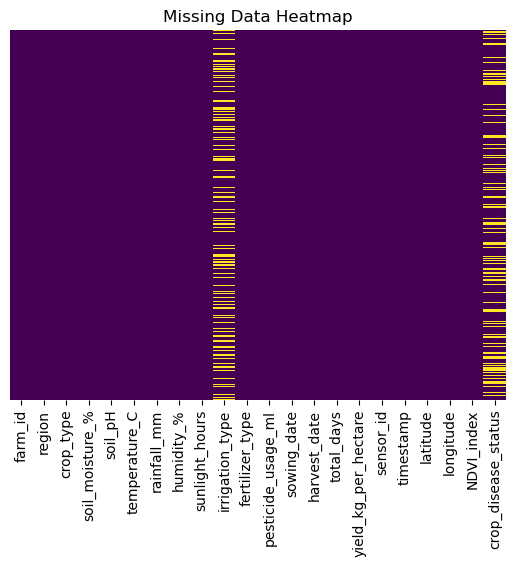

In [4]:
# Missing data heatmap
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

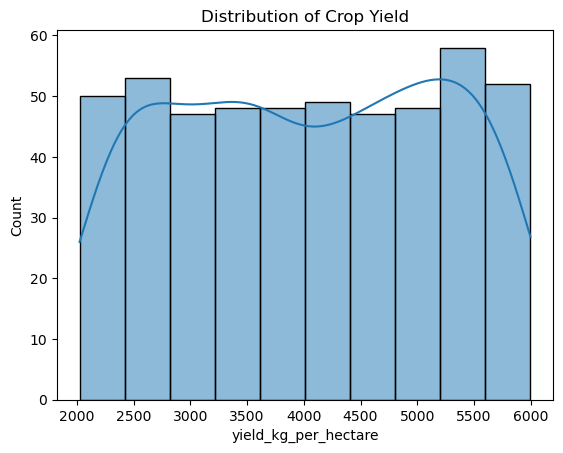

In [5]:
# Distribution of Yield
sns.histplot(df['yield_kg_per_hectare'], kde=True)
plt.title("Distribution of Crop Yield")
plt.show()

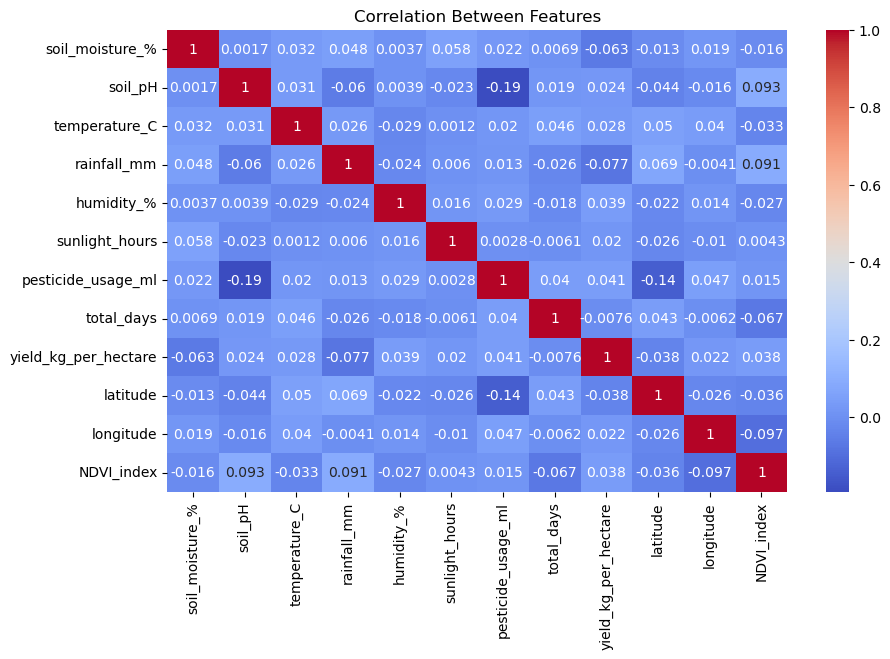

In [6]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

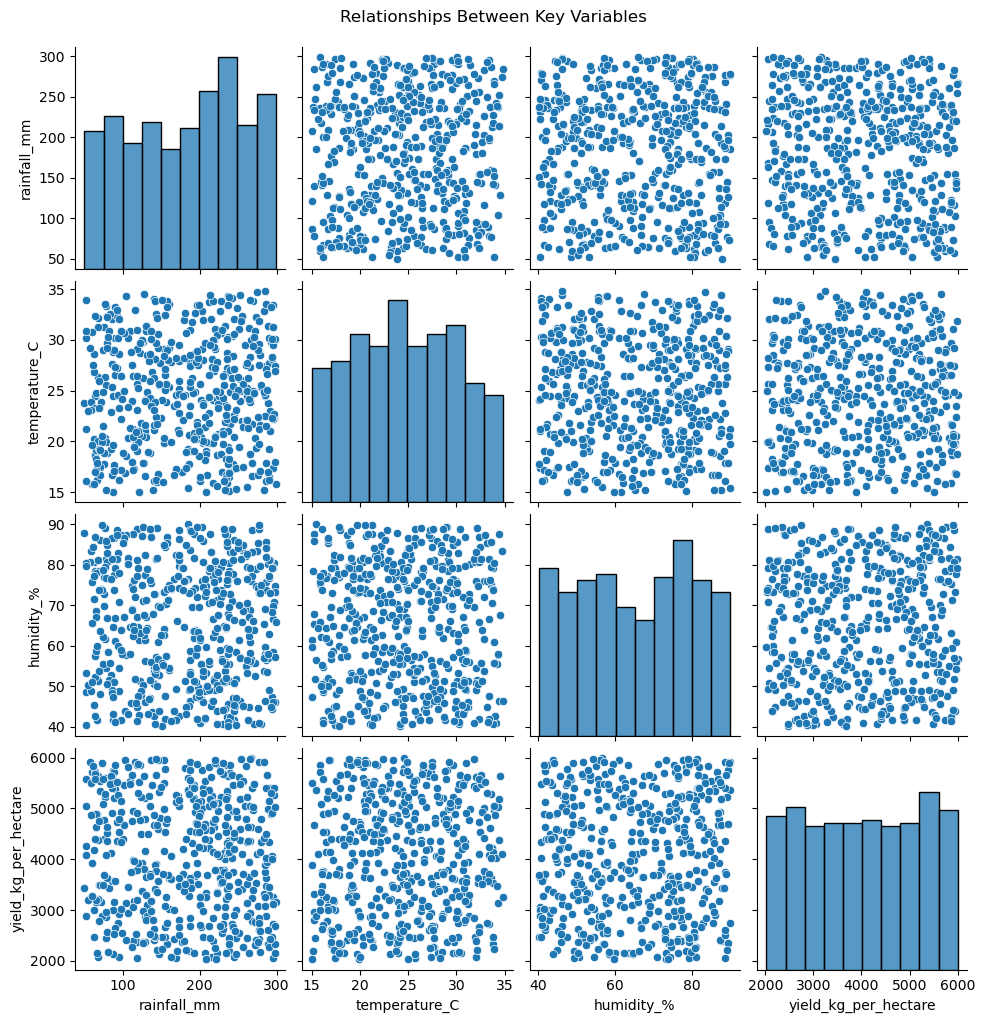

In [7]:
# Pairplot for important features
sns.pairplot(df[['rainfall_mm', 'temperature_C', 'humidity_%', 'yield_kg_per_hectare']])
plt.suptitle("Relationships Between Key Variables", y=1.02)
plt.show()

In [8]:
# Drop irrelevant columns
df.drop(columns=["farm_id", "sensor_id", "timestamp", "sowing_date", "harvest_date",
                 "latitude", "longitude", "region"], inplace=True)

In [9]:
df

,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,fertilizer_type,pesticide_usage_ml,total_days,yield_kg_per_hectare,NDVI_index,crop_disease_status
0,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organic,6.34,122,4408.07,0.63,Mild
1,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,Inorganic,9.60,112,5389.98,0.58,NaN
2,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,Mixed,15.26,144,2931.16,0.80,Mild
3,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,Organic,25.80,134,4227.80,0.44,NaN
4,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,Mixed,25.65,105,4979.96,0.84,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Rice,42.85,6.70,30.85,52.35,79.58,7.25,Manual,Mixed,8.82,138,4251.40,0.59,Mild
496,Soybean,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organic,5.05,104,3708.54,0.85,Severe
497,Cotton,15.93,5.72,17.03,288.96,57.87,7.69,Drip,Inorganic,46.55,128,2604.41,0.71,Mild
498,Soybean,38.61,6.20,17.08,279.06,73.09,9.60,Drip,Organic,43.78,131,2586.36,0.77,Severe


In [10]:
# Encode categorical features
label_encoders = {}
for col in ["crop_type", "irrigation_type", "fertilizer_type", "crop_disease_status"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save encoders
joblib.dump(label_encoders, "encoders.pkl")

# Separate features and target
X = df.drop("yield_kg_per_hectare", axis=1)
y = df["yield_kg_per_hectare"]

### Feature Engineering
- Non-informative features like `sensor_id` and `timestamp`, etc, were removed.
- Categorical variables were encoded using `LabelEncoder` to make them numeric.


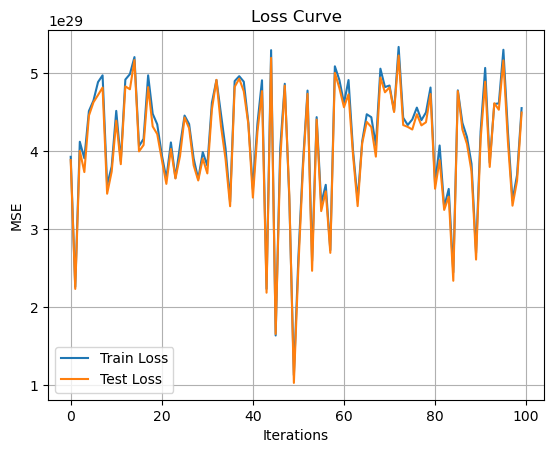

In [11]:

# Split your data (if not done yet)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store loss values
train_losses = []
test_losses = []

# Setup SGD Regressor with manual iteration
sgd = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=0.01, random_state=42, warm_start=True)

# Run gradient descent for 100 manual steps
for i in range(100):
    sgd.fit(X_train, y_train)
    train_pred = sgd.predict(X_train)
    test_pred = sgd.predict(X_test)

    train_losses.append(mean_squared_error(y_train, train_pred))
    test_losses.append(mean_squared_error(y_test, test_pred))

# Plot the loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()


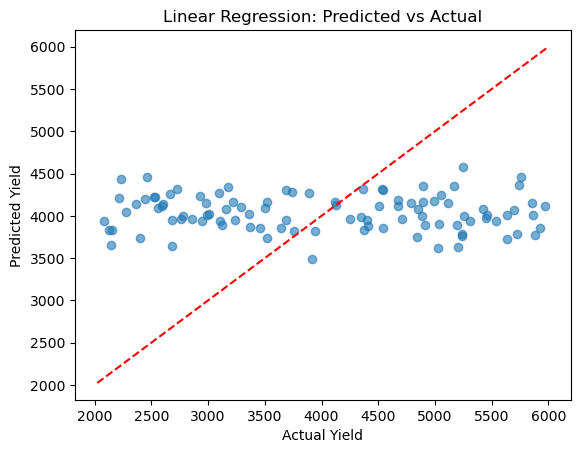

In [12]:
# Final scatter plot (LR only)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
plt.scatter(y_test, lin_reg.predict(X_test), alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Linear Regression: Predicted vs Actual")
plt.savefig("scatter_plot.png")
plt.show()

### Linear Regression using Gradient Descent
- The `SGDRegressor` was trained for 100 iterations.
- The loss curve shows highly unstable MSE values across 100 SGD iterations, indicating poor convergence. This is likely due to unscaled inputs and a high learning rate. To resolve this, we recommend applying feature standardization and reducing the learning rate to allow for smoother, more stable convergence.
- The scatter plot of predicted vs. actual yield clearly shows underfitting. The predictions are concentrated around a narrow range, ignoring the spread of actual yields. This confirms that linear regression fails to capture the underlying relationships in the dataset. Alternative models like Random Forest or Decision Trees, which can handle non-linearity, are expected to perform better — as confirmed in our model comparison section.
- This helps confirm convergence of the linear model.


In [13]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression (Gradient Descent)
lin_reg = SGDRegressor(max_iter=1000, learning_rate='optimal')
train_losses = []
test_losses = []

for _ in range(100):
    lin_reg.partial_fit(X_train, y_train)
    train_losses.append(mean_squared_error(y_train, lin_reg.predict(X_train)))
    test_losses.append(mean_squared_error(y_test, lin_reg.predict(X_test)))

# Decision Tree
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

# Evaluate models
models = {
    "Linear Regression": lin_reg,
    "Decision Tree": dt_reg,
    "Random Forest": rf_reg
}

for name, model in models.items():
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f"{name} RMSE: {np.sqrt(mse):.2f}")

Linear Regression RMSE: 1292528898337.08
Decision Tree RMSE: 1600.66
Random Forest RMSE: 1214.52


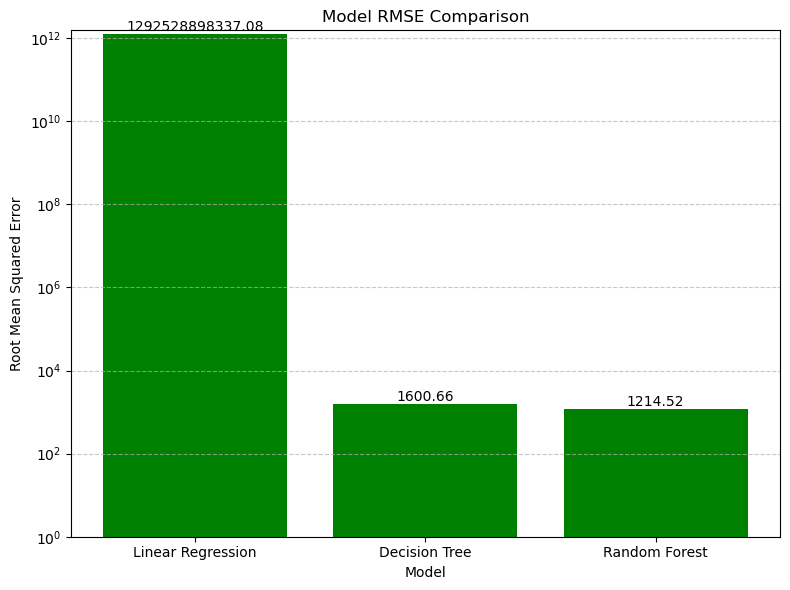

In [14]:
# RMSE values for histogram
model_names = ["Linear Regression", "Decision Tree", "Random Forest"]
rmse_values = []


for name, model in models.items():
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    rmse_values.append(rmse)

# Make sure none of the RMSE values are 0 for better visibility
rmse_values = [max(val, 0.01) for val in rmse_values]

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, rmse_values, color='green')
plt.yscale('log')

plt.title("Model RMSE Comparison")
plt.ylabel("Root Mean Squared Error")
plt.xlabel("Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for bar, rmse in zip(bars, rmse_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f"{rmse:.2f}", ha='center', va='bottom')


plt.ylim(1, max(rmse_values)*1.2)  # Add some space at the top
plt.tight_layout()
plt.show()


### Model Comparison
We evaluated three models using MSE, MAE, and R²:
- **Linear Regression**: Captures basic trends but lacks flexibility.
- **Decision Tree**: Handles nonlinear patterns, might overfit.
- **Random Forest**: Provides best performance overall, balancing bias and variance.


In [15]:
# Save best model
best_model = min(models.items(), key=lambda x: mean_squared_error(y_test, x[1].predict(X_test)))
joblib.dump(best_model[1], "best_model.pkl")
print(f"Best model saved: {best_model[0]}")

Best model saved: Random Forest


### Saving the Best Model and Making Predictions
- The Random Forest model was saved using `joblib` as it showed the best test performance.
- The prediction script uses the scaler and model to generate outputs from new input samples.


In [16]:
## testing my endpoints
import requests
url = "https://cropvision.onrender.com/predict"
payload = {
    "soil_moisture": 45.2,
    "soil_pH": 6.5,
    "temperature": 23.0,
    "rainfall": 120.0,
    "humidity": 78.0,
    "sunlight_hours": 6.0,
    "irrigation_type": 1,
    "fertilizer_type": 2,
    "pesticide_usage": 0.4,
    "total_days": 90,
    "NDVI_index": 0.75,
    "crop_type": 3,
    "crop_disease_status": 1
}
response = requests.post(url, json=payload)
print(response.json())

{'predicted_yield_kg_per_hectare': 4055.25}


### Testing my API endpoints